In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

## To - Do's

1. make the file path invariant by using import os
2. ...

# Predicting Prices of used Cars sold on Ebay - Kleinanzeigen

In [2]:
ebay = pd.read_csv("./data/ebay-8.csv")

In [3]:
ebay.head()

,Marke,Modell,Kilometerstand,Erstzulassung,Kraftstoffart,Leistung,Getriebe,Fahrzeugtyp,Anzahl Türen,Umweltplakette,Außenfarbe,Material Innenausstattung,Fahrzeugzustand,price,url,HU bis,Schadstoffklasse,HU Monat
0,Ford,Weitere Ford,69.800 km,Februar 2018,Benzin,530 PS,Automatik,SUV/Geländewagen,4/5,4 (Grün),Schwarz,Vollleder,Unbeschädigtes Fahrzeug,67.900 € VB,https://www.ebay-kleinanzeigen.de/s-anzeige/fo...,NaN,NaN,NaN
1,BMW,3er,227.000 km,Juni 2002,Benzin,116 PS,Manuell,Kombi,4/5,4 (Grün),Schwarz,Stoff,Unbeschädigtes Fahrzeug,1.500 € VB,https://www.ebay-kleinanzeigen.de/s-anzeige/bm...,Dezember 2021,Euro4,NaN
2,Opel,Insignia,12.076 km,März 2020,Diesel,170 PS,Automatik,Kombi,4/5,4 (Grün),Schwarz,Stoff,Unbeschädigtes Fahrzeug,22.700 €,https://www.ebay-kleinanzeigen.de/s-anzeige/op...,März 2023,NaN,NaN
3,Ford,Fiesta,250.000 km,Mai 2001,NaN,NaN,NaN,Kombi,4/5,4 (Grün),Schwarz,NaN,NaN,200 €,https://www.ebay-kleinanzeigen.de/s-anzeige/fo...,September 2023,NaN,NaN
4,Volkswagen,Golf,264.000 km,2000,Benzin,210 PS,Manuell,Kleinwagen,2/3,4 (Grün),Schwarz,Stoff,NaN,4.500 € VB,https://www.ebay-kleinanzeigen.de/s-anzeige/go...,September 2022,NaN,NaN


In [4]:
ebay.shape

(14133, 18)

In [5]:
ebay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14133 entries, 0 to 14132
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Marke                      14133 non-null  object 
 1   Modell                     13909 non-null  object 
 2   Kilometerstand             14133 non-null  object 
 3   Erstzulassung              14133 non-null  object 
 4   Kraftstoffart              13975 non-null  object 
 5   Leistung                   13612 non-null  object 
 6   Getriebe                   13951 non-null  object 
 7   Fahrzeugtyp                13402 non-null  object 
 8   Anzahl Türen               13662 non-null  object 
 9   Umweltplakette             11707 non-null  object 
 10  Außenfarbe                 14133 non-null  object 
 11  Material Innenausstattung  12563 non-null  object 
 12  Fahrzeugzustand            12234 non-null  object 
 13  price                      14133 non-null  obj

In [6]:
ebay.isna().sum() / len(ebay) *100

Marke                         0.000000
Modell                        1.584943
Kilometerstand                0.000000
Erstzulassung                 0.000000
Kraftstoffart                 1.117951
Leistung                      3.686408
Getriebe                      1.287766
Fahrzeugtyp                   5.172292
Anzahl Türen                  3.332626
Umweltplakette               17.165499
Außenfarbe                    0.000000
Material Innenausstattung    11.108753
Fahrzeugzustand              13.436638
price                         0.000000
url                           0.000000
HU bis                       24.198684
Schadstoffklasse             22.203354
HU Monat                     99.936319
dtype: float64

## 2. Data Exploration &  Cleaning

In [7]:
#drop irrelevant columns
ebay.drop(columns= ["HU Monat", "HU bis", "Schadstoffklasse", "Umweltplakette", "Modell", "url"], axis = 1, inplace = True)

In [8]:
#drop null values
ebay.dropna(inplace= True)

In [9]:
#drop duplicates
ebay.duplicated().sum()
ebay = ebay.drop_duplicates().reset_index(drop= True)

### Price

In [10]:
#convert price to numeric feature
ebay.price = pd.to_numeric(ebay.price.apply(lambda x: x.replace("€",'').replace("VB", '').replace('.','')))

In [11]:
#inspect descriptive statistics of price variable
round(ebay.price.describe(),2)

count        8681.00
mean        12636.97
std        133657.37
min             1.00
25%          3800.00
50%          8000.00
75%         14890.00
max      12345678.00
Name: price, dtype: float64

In [12]:
#drop price outliers
i = ebay[ebay.price == ebay.price.max()].index
ebay.drop(i, inplace= True)

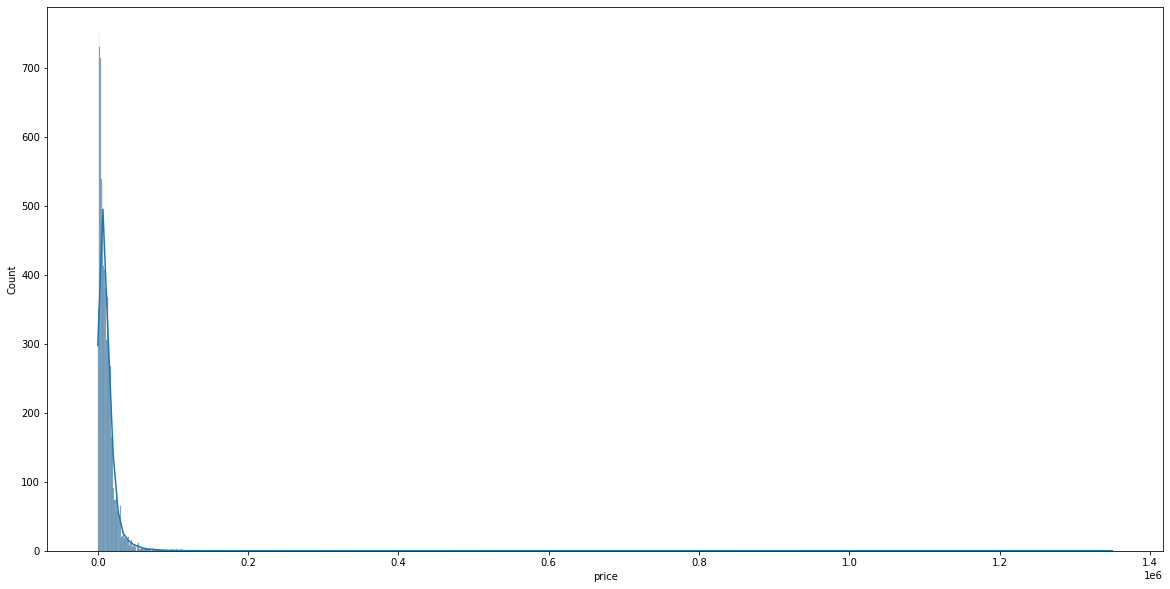

In [13]:
plt.figure(figsize= (20,10))
sns.histplot(data= ebay, x= "price", kde= True);

### Kilometerstand

In [14]:
#converting kilometers to numeric feature
ebay.Kilometerstand = pd.to_numeric(ebay.Kilometerstand.apply(lambda x: x.replace("km",'').replace('.','')))

In [15]:
#inspect descriptive statistics of price variable
round(ebay.Kilometerstand.describe(),2)

count       8753.00
mean      135223.97
std        86968.07
min            0.00
25%        73000.00
50%       128000.00
75%       184000.00
max      1920000.00
Name: Kilometerstand, dtype: float64

In [16]:
#dropping outliers and false values
i = []

max_ = ebay[ebay.Kilometerstand == ebay.Kilometerstand.max()].index
i.append(max_[0])

wrong_values = [i for i in ebay[ebay.Kilometerstand == 999999].index]
i.extend(wrong_values)

ebay.drop(i, inplace= True)

In [17]:
#drop price outliers
i = ebay[ebay.price == ebay.price.max()].index
ebay.drop(i, inplace= True)

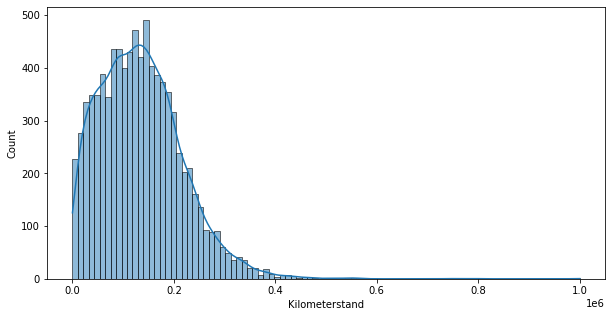

In [18]:
#plotting distribution of driven kilometers as histogram
plt.figure(figsize= (10,5))
sns.histplot(data= ebay, x= "Kilometerstand", kde= True);

### Leistung

In [19]:
#converting horsepowers to numeric value
ebay["Leistung"] = ebay["Leistung"].apply(lambda x: int(x.replace("PS", "")))

In [20]:
#inspecting summary statistics
ebay.Leistung.describe()

count    8745.000000
mean      144.076272
std        73.816719
min         0.000000
25%        99.000000
50%       131.000000
75%       170.000000
max       700.000000
Name: Leistung, dtype: float64

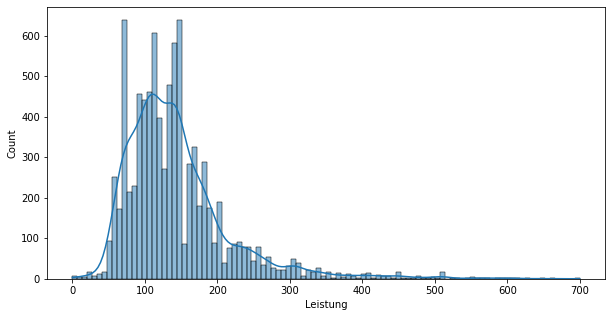

In [21]:
#plotting distribution of horsepower
plt.figure(figsize= (10,5))
sns.histplot(data= ebay, x= "Leistung", kde= True);

### Erstzulassung

In [22]:
#creating a new feature "Age" by calculating nr. of years since initial registration
year = datetime.now().year
ebay["Alter"] = year - ebay.Erstzulassung.apply(lambda x: int(x[-4:]))
ebay.drop("Erstzulassung", axis= 1, inplace= True)

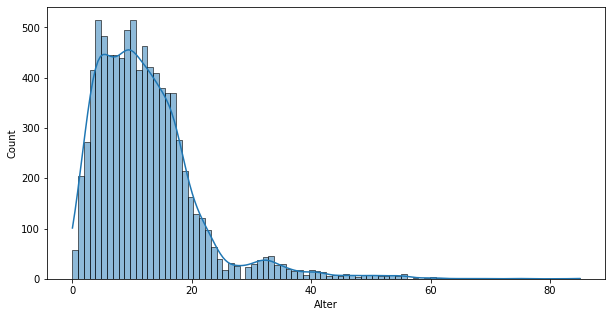

In [23]:
#plotting distribution of car age
plt.figure(figsize= (10,5))
sns.histplot(data= ebay, x= "Alter", kde= True);

In [24]:
ebay.sort_values(by= "Alter", ascending= False).head(20)

,Marke,Kilometerstand,Kraftstoffart,Leistung,Getriebe,Fahrzeugtyp,Anzahl Türen,Außenfarbe,Material Innenausstattung,Fahrzeugzustand,price,Alter
7646,Ford,123456,Benzin,65,Manuell,Coupé,2/3,Beige,Vollleder,Unbeschädigtes Fahrzeug,39000.0,85
5377,Opel,53000,Benzin,23,Manuell,Limousine,2/3,Grau,Stoff,Unbeschädigtes Fahrzeug,21500.0,85
7577,Weitere Automarken,27000,Benzin,54,Manuell,Cabrio,2/3,Beige,Vollleder,Unbeschädigtes Fahrzeug,27750.0,75
5933,Weitere Automarken,123456,Benzin,72,Manuell,Coupé,2/3,Braun,Vollleder,Unbeschädigtes Fahrzeug,25000.0,74
7301,Opel,41122,Benzin,39,Manuell,Limousine,2/3,Beige,Stoff,Unbeschädigtes Fahrzeug,34952.0,69
7333,Weitere Automarken,77777,Benzin,17,Manuell,Limousine,2/3,Beige,Stoff,Unbeschädigtes Fahrzeug,25000.0,67
7589,Audi,43650,Benzin,38,Manuell,Limousine,2/3,Beige,Vollleder,Unbeschädigtes Fahrzeug,11800.0,65
7705,Weitere Automarken,123456,Benzin,256,Automatik,Limousine,4/5,Beige,Andere Materialien Innenausstattung,Unbeschädigtes Fahrzeug,20900.0,62
8030,Weitere Automarken,355,Benzin,65,Manuell,Cabrio,2/3,Gold,Vollleder,Unbeschädigtes Fahrzeug,32950.0,61
3172,BMW,68000,Benzin,30,Manuell,Limousine,2/3,Weiß,Teilleder,Unbeschädigtes Fahrzeug,12990.0,61


### Marke

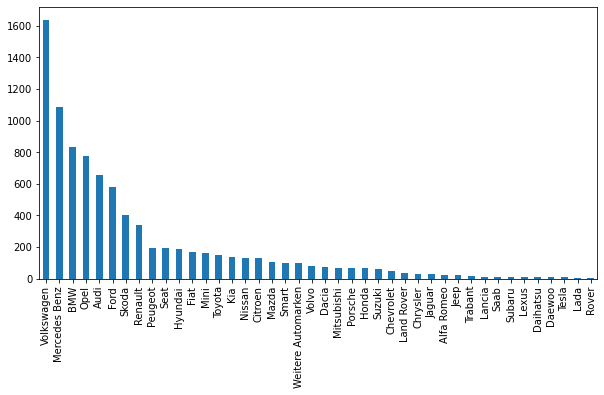

In [25]:
#plotting value counts for car brands
plt.figure(figsize= (10,5))
ebay.Marke.value_counts().plot(kind= "bar")
plt.xticks(rotation= 90);

### Kraftstoffart

In [26]:
ebay.Kraftstoffart.unique()

array(['Benzin', 'Diesel', 'Elektro', 'Autogas (LPG)', 'Hybrid',
       'Andere Kraftstoffarten', 'Erdgas (CNG)'], dtype=object)

### Fahrzeugzustand

1. unbeschädigtes Fahrzeug: 0
2. beschädigtes Fahrzeug: 1

In [27]:
ebay["Fahrzeugzustand"] = ebay["Fahrzeugzustand"].map({
    "Unbeschädigtes Fahrzeug": 0,
    "Beschädigtes Fahrzeug": 1
})

### Kraftstoffart

In [28]:
ebay.Kraftstoffart.unique()

array(['Benzin', 'Diesel', 'Elektro', 'Autogas (LPG)', 'Hybrid',
       'Andere Kraftstoffarten', 'Erdgas (CNG)'], dtype=object)

### Getriebe

In [29]:
ebay.Getriebe.value_counts()

Manuell      5545
Automatik    3200
Name: Getriebe, dtype: int64

In [30]:
ebay.Getriebe = ebay.Getriebe.map({
    "Manuell": 1,
    "Automatik": 0
})

### Fahrzeugtyp

In [31]:
ebay.Fahrzeugtyp.value_counts()

Limousine               2506
Kombi                   1654
Kleinwagen              1526
SUV/Geländewagen        1040
Van/Bus                 1037
Coupé                    461
Cabrio                   439
Andere Fahrzeugtypen      82
Name: Fahrzeugtyp, dtype: int64

## Correlations

<AxesSubplot:>

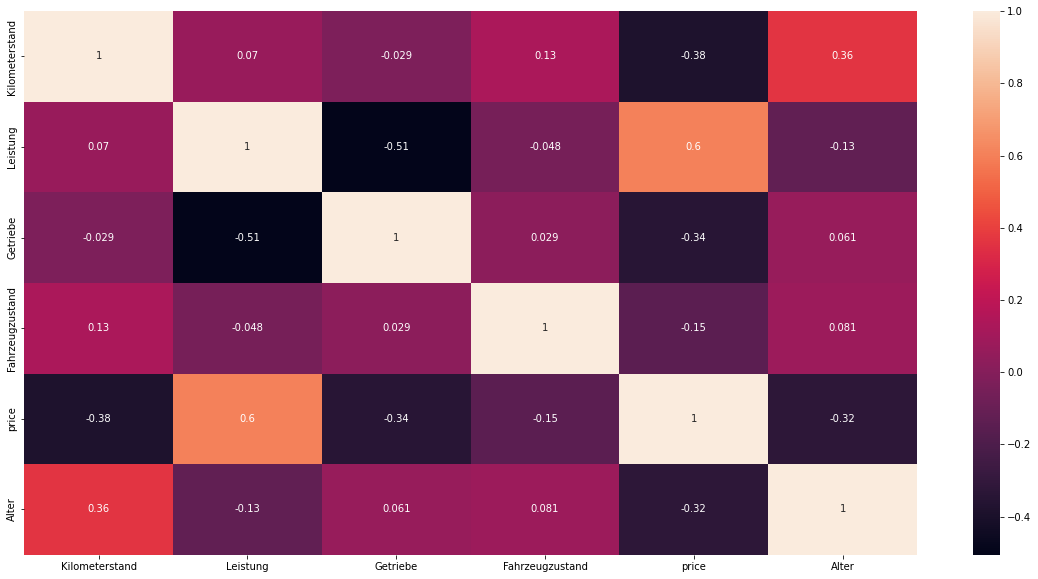

In [32]:
plt.figure(figsize= (20,10))
sns.heatmap(ebay.select_dtypes(exclude= "object").corr(), annot= True)

## Statsmodel Linear Regression

In [33]:
import statsmodels.formula.api as smf

mod = smf.ols(formula='price ~ Kilometerstand + Leistung + Alter + Fahrzeugzustand', data=ebay).fit()

In [34]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     2753.
Date:                Wed, 27 Oct 2021   Prob (F-statistic):               0.00
Time:                        19:51:53   Log-Likelihood:                -89837.
No. Observations:                8672   AIC:                         1.797e+05
Df Residuals:                    8667   BIC:                         1.797e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        6316.0745    239.005     26.427      0.000    5847.568    6784.581
Kilometerstand     -0.0537      0.001    -49.020      0.000      -0.056      -0.052
Leistung           95.8814      1.132     84.678      0.000      93.662      98.101
Alter            -137.7201     10.260    -13.423      0.000    -157.832    -117.608
Fahrzeugzustand -2783.3041    326.779     -8.517      0.000   -3423.869   -2142.739
==============================================================================
Omnibus:                     8679.941   Durbin-Watson:                   1.877
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1520491.745
Skew:                           4.491   Prob(JB):                         0.00
Kurtosis:                      67.244   Cond. No.                     6.26e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Prepare ML Dataframe

In [35]:
ebay.head()

,Marke,Kilometerstand,Kraftstoffart,Leistung,Getriebe,Fahrzeugtyp,Anzahl Türen,Außenfarbe,Material Innenausstattung,Fahrzeugzustand,price,Alter
0,Ford,69800,Benzin,530,0,SUV/Geländewagen,4/5,Schwarz,Vollleder,0,67900.0,3
1,BMW,227000,Benzin,116,1,Kombi,4/5,Schwarz,Stoff,0,1500.0,19
2,Opel,12076,Diesel,170,0,Kombi,4/5,Schwarz,Stoff,0,22700.0,1
3,Audi,143000,Benzin,102,1,Limousine,2/3,Schwarz,Stoff,0,3900.0,14
4,Smart,26905,Benzin,71,0,Limousine,4/5,Schwarz,Stoff,0,9979.0,4


### Get OneHotEncoded categorical features

In [39]:
df = ebay.drop(columns= [
    "Kraftstoffart",
    "Anzahl Türen",
    "Außenfarbe",
    "Material Innenausstattung"
])

df.head()

,Marke,Kilometerstand,Leistung,Getriebe,Fahrzeugtyp,Fahrzeugzustand,price,Alter
0,Ford,69800,530,0,SUV/Geländewagen,0,67900.0,3
1,BMW,227000,116,1,Kombi,0,1500.0,19
2,Opel,12076,170,0,Kombi,0,22700.0,1
3,Audi,143000,102,1,Limousine,0,3900.0,14
4,Smart,26905,71,0,Limousine,0,9979.0,4


In [40]:
features = ebay[["Marke", "Fahrzeugtyp"]]

one_hot = pd.get_dummies(data=features, drop_first=True)

df.drop(columns= ["Marke", "Fahrzeugtyp"], inplace= True)

df = df.join(one_hot)

df.head()

,Kilometerstand,Leistung,Getriebe,Fahrzeugzustand,price,Alter,Marke_Audi,Marke_BMW,Marke_Chevrolet,Marke_Chrysler,...,Marke_Volkswagen,Marke_Volvo,Marke_Weitere Automarken,Fahrzeugtyp_Cabrio,Fahrzeugtyp_Coupé,Fahrzeugtyp_Kleinwagen,Fahrzeugtyp_Kombi,Fahrzeugtyp_Limousine,Fahrzeugtyp_SUV/Geländewagen,Fahrzeugtyp_Van/Bus
0,69800,530,0,0,67900.0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,227000,116,1,0,1500.0,19,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,12076,170,0,0,22700.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,143000,102,1,0,3900.0,14,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,26905,71,0,0,9979.0,4,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Standardize features

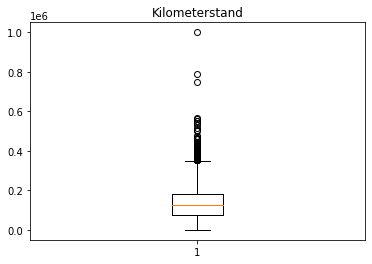

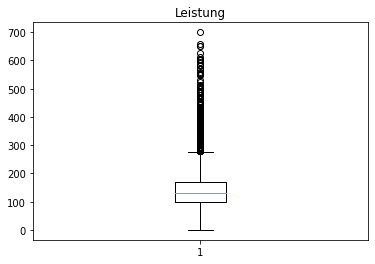

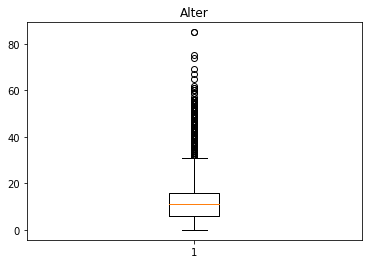

In [42]:
features= ["Kilometerstand", "Leistung", "Alter"]

for i in features:
    plt.boxplot(df[i])
    plt.title(i)
    plt.show();

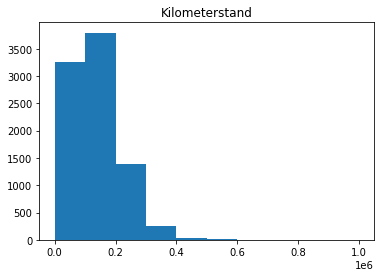

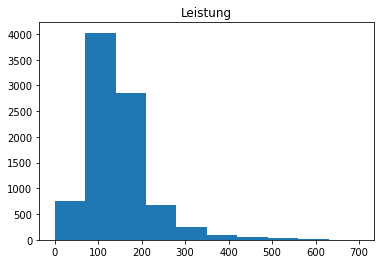

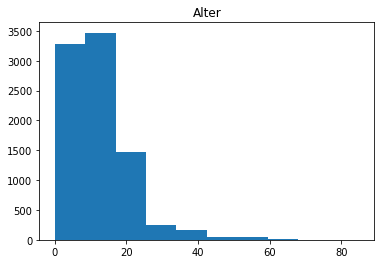

In [43]:
features= ["Kilometerstand", "Leistung", "Alter"]

for i in features:
    plt.hist(df[i])
    plt.title(i)
    plt.show();

In [44]:
from sklearn.preprocessing import RobustScaler

features= ["Kilometerstand", "Leistung", "Alter"]

scaler = RobustScaler()

for feature in features:
    
    scaler.fit(df[[feature]])
    
    df[feature] = scaler.transform(df[[feature]])

In [45]:
df.dropna(inplace= True)

In [46]:
df.head()

,Kilometerstand,Leistung,Getriebe,Fahrzeugzustand,price,Alter,Marke_Audi,Marke_BMW,Marke_Chevrolet,Marke_Chrysler,...,Marke_Volkswagen,Marke_Volvo,Marke_Weitere Automarken,Fahrzeugtyp_Cabrio,Fahrzeugtyp_Coupé,Fahrzeugtyp_Kleinwagen,Fahrzeugtyp_Kombi,Fahrzeugtyp_Limousine,Fahrzeugtyp_SUV/Geländewagen,Fahrzeugtyp_Van/Bus
0,-0.524324,5.619718,0,0,67900.0,-0.8,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.891892,-0.211268,1,0,1500.0,0.8,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,-1.044360,0.549296,0,0,22700.0,-1.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.135135,-0.408451,1,0,3900.0,0.3,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.910766,-0.845070,0,0,9979.0,-0.7,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Applying Model

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

In [57]:
X = df.drop(columns="price")

y = df["price"]

### Training simple LinearRegression Model

In [58]:
model = LinearRegression()

cv_result = cross_validate(model, X, y)

score = cv_result["test_score"].mean()

score

0.5553293671127947

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 1)

model = LinearRegression().fit(X_train, y_train)

model.score(X_test, y_test)

0.6228041020172128

### Feature Permutation to assess feature importance

In [64]:
permutation_score = permutation_importance(model, X, y, n_repeats=10) # Perform Permutation

importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T) # Unstack results
importance_df.columns=['feature','score decrease']

importance_df.sort_values(by="score decrease", ascending = False) # Order by importance



,feature,score decrease
1,Leistung,0.572248
0,Kilometerstand,0.337409
43,Marke_Volkswagen,0.066615
25,Marke_Mercedes Benz,0.048976
50,Fahrzeugtyp_Limousine,0.044093
31,Marke_Porsche,0.035167
4,Alter,0.026633
48,Fahrzeugtyp_Kleinwagen,0.025542
5,Marke_Audi,0.023897
49,Fahrzeugtyp_Kombi,0.022991


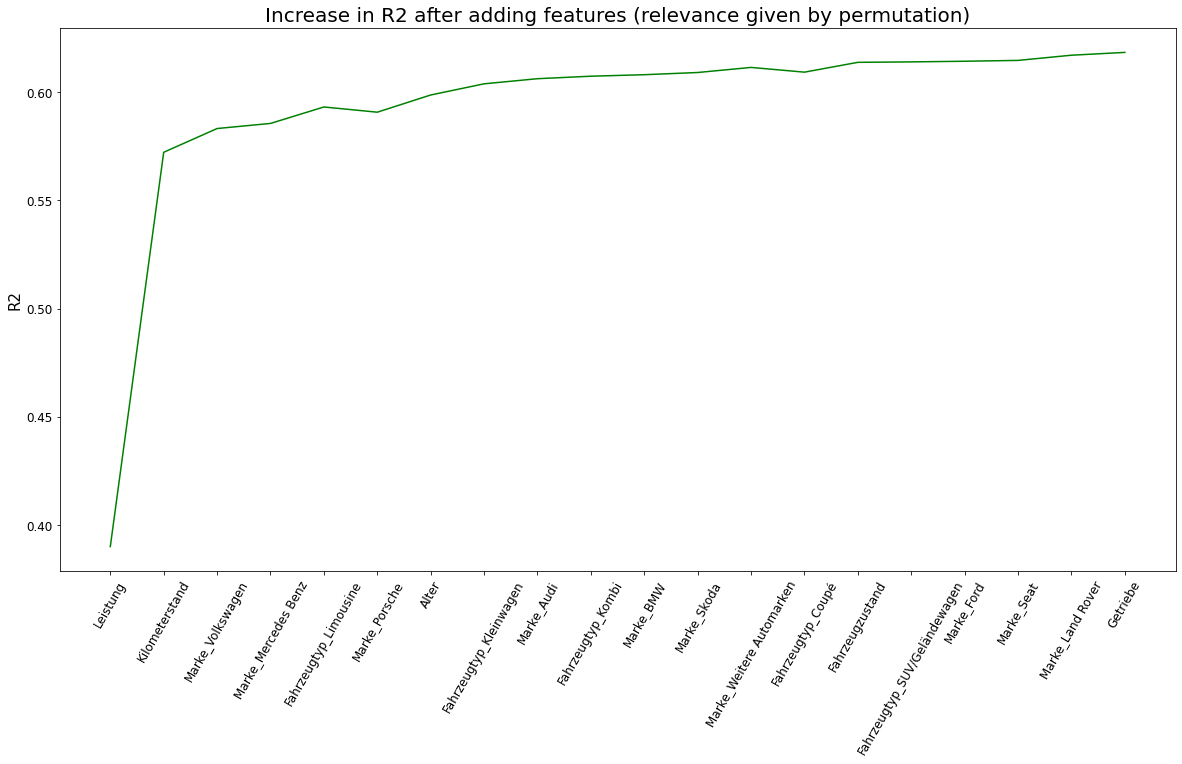

In [95]:
x_axis= []
y_axis= []

for i in range(1,21):

    new_features = importance_df.sort_values(by="score decrease", ascending = False)["feature"][:i]

    X_new = df[new_features]

    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state= 1)

    model = LinearRegression().fit(X_train, y_train)

    score = model.score(X_test, y_test)
    
    y_axis.append(score)
    
    x_axis = list(new_features)
    
plt.figure(figsize= (20,10))
plt.plot(x_axis, y_axis, color= "green")
plt.title("Increase in R2 after adding features (relevance given by permutation)", size= 20)
plt.ylabel("R2", size= 15)
plt.yticks(size=12)
plt.xticks(rotation= 60, size= 12);

## Learning Curves

/Users/garritwilson/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/garritwilson/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/garritwilson/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/garritwilson/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/garri

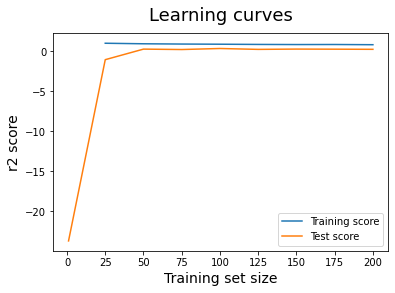

In [51]:
import numpy as np
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

X = df.drop(columns="price")
y = df["price"]

train_sizes = [1,25,50,75,100,125,150,175,200]
# Get train scores (R2), train sizes, and validation scores using `learning_curve`
train_sizes, train_scores, test_scores = learning_curve(
    estimator=LinearRegression(), X=X, y=y, train_sizes=train_sizes, cv=5)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()

# Python function to predict price

In [52]:
ebay.dropna(inplace= True)

In [53]:
from sklearn.linear_model import LinearRegression

model= LinearRegression()

X = df[["Kilometerstand", "Leistung", "Alter"]]
y= df["price"]

model.fit(X,y)

LinearRegression()

In [54]:
def get_car_price(km, ps, age, model):
    
    X = [[km,ps,age]]
    
    prediction= f"{round(model.predict(X)[0],2)} €"
    
    return prediction

In [55]:
get_car_price(19800,670,6,model)

'-115990008.3 €'

# Sandbox

In [ ]:
ebay.select_dtypes(include="int").boxplot();